# Markov-Decision-Process

## Terms Definition

todo this part lastly

## MDP Gridworld

First thing - import libraries.

In [1]:
from IPython.display import Image
import pickle
from MDP.utilitiy import TransitionModel, reward_function

### Transition Model & Reward Function

For constructing the transition model I was needed to compute
4 different matrices, one for each action. For each action I computed the probability
for moving from $s$ state to $s'$ state using the action. Then I construct this as a matrix where
the rows represent the 'from' state and the columns represent the 'to'. For example the probability
in cell $(3,4)$ represent the probability to move from state $3$ to state $4$ using the action.

I'm not sure if it is needed but I show the probability matrix I got for each action. I saved them as pickle files
so I first load them and then print each matrix with the corresponding action:

In [2]:
actions = ['north', 'east', 'south', 'west']
matrices = []
for a in actions:

    path = 'transition_model/{}.pkl'.format(a)
    matrices.append(pickle.load(open(path, 'rb')))
    print('\nAction = {} \n{}'.format(a.capitalize(), matrices[-1]))


Action = North 
     1    2    3    4    5    6    7    8    9    10   11   12   13   14   16
1   1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.8  0.1  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.8  0.1  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.8  0.1  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.1  0.0  0.0  0.0  0.8  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.1  0.0  0.0  0.8  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.0  0.0
7   0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
8   0.0  0.0  0.0  0.1  0.0  0.0  0.8  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0
9   0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.0  0.8  0.0  0.0  0.0  0.1  0.0  0.0
10  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.8  0.0  0.0  0.0  0.0  0.1  0.0
11  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0  0.0  0.8  0.1  0.0  0.0  0.0  0.0
12  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.1  0.0

Now to make it easier for use I created a class names `TransitionModel` which wrap all the above-mentioned
matrices. The constructor of the class gets list of actions and list of probability matrices (as pandas DataFrames).
Then I implemented the method `prob` which computes the probability $p(s'|s,a)$. For example:

In [3]:
tm = TransitionModel(actions = [a[0] for a in actions],
                     transition_matrices=matrices)

print('P(s` = 1 | s = 5, a = N) = {}'.format(tm.prob(1, 5, 0)))

P(s` = 1 | s = 5, a = N) = 0.1


As I understand the problem, the reward function depends only on the state (and not on $a$ or $s'$).
So, all the states the robot gets reward of $-0.04$ except goal state ($+1$), hole ($-1$)
and obstacle (not reachable state). I implement the reward function as dict, where the keys are the state
and the values are the rewards.

In [4]:
rewards = reward_function(holes=[1, 7, 14],
                          goals=[13],
                          obstacles=[15])

# Print the final reward function
print('Reward function: {}'.format(rewards))

Reward function: {1: -1, 2: -0.04, 3: -0.04, 4: -0.04, 5: -0.04, 6: -0.04, 7: -1, 8: -0.04, 9: -0.04, 10: -0.04, 11: -0.04, 12: -0.04, 13: 1, 14: -1, 16: -0.04}


And now for the graphical model when action is 'North':

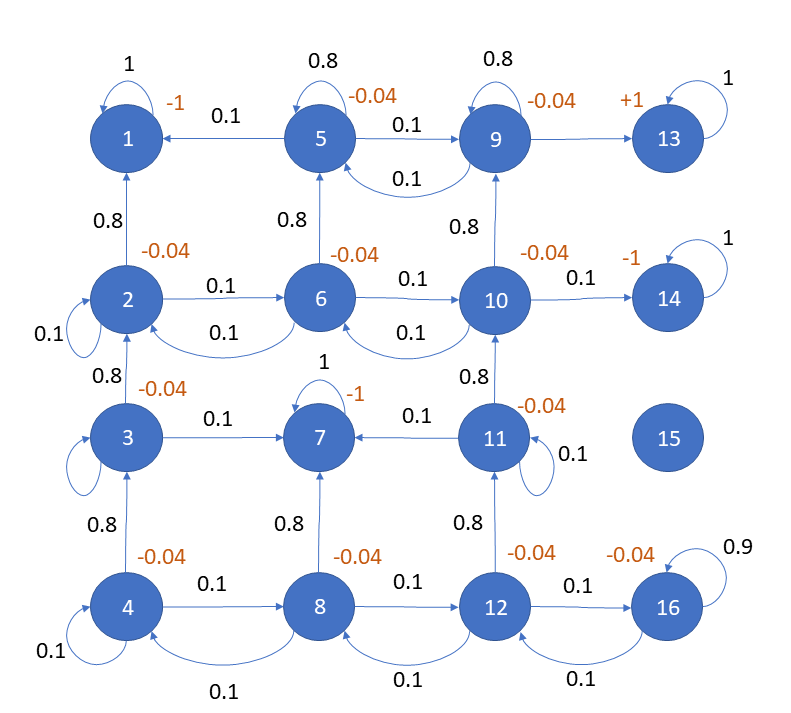

In [6]:
Image(filename='transition_model/MDP_north.png')

### Value Iteration I

### Value Iteration II

### Policy Iteration